In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing

data = pd.read_csv('../../../../CC GENERAL.csv').iloc[:,1:].dropna()

#print(data)
from jupyterthemes import jtplot
jtplot.style('grade3')

In [2]:
#1 Проведем кластеризацию методом k-средних
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

KMeans(n_clusters=3, n_init=15)

In [3]:
#2 Стандартизируем данные
from sklearn import preprocessing
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)


In [4]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN().fit(scaled_data)
#print(set(clustering.labels_))
#print(len(set(clustering.labels_)) - 1)
print(list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

0.7512737378415933


100%|██████████| 12/12 [00:33<00:00,  2.76s/it]


[36, 16, 11, 5, 2, 2, 1, 1, 1, 1, 1, 1]
[0.7512737378415933, 0.5019685039370079, 0.2946966188050023, 0.17612320518758684, 0.11023622047244094, 0.06866604909680407, 0.048286243631310795, 0.03531727651690598, 0.025590551181102362, 0.018527095877721167, 0.015632237146827235, 0.01285317276516906]


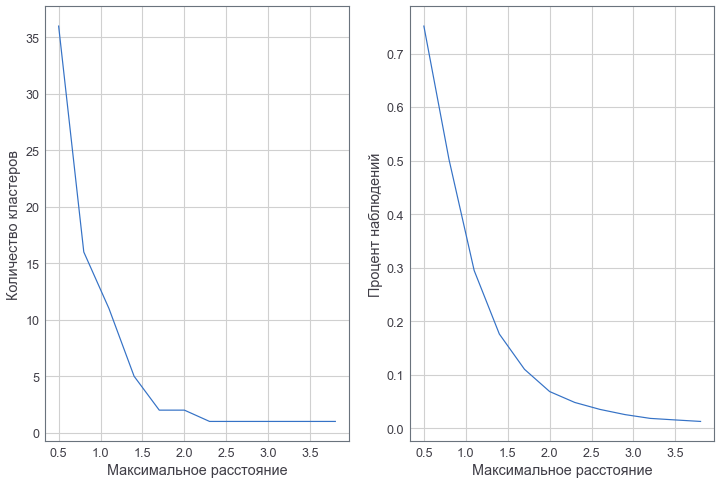

In [5]:
from tqdm import tqdm
eps = np.arange(0.5, 4, 0.3)

cl_num = []
obs_num = []

for i in tqdm(range(len(eps))):
    clus = DBSCAN(eps=eps[i]).fit(scaled_data)
    cl_num.append(len(set(clus.labels_)) - 1)
    obs_num.append(list(clus.labels_).count(-1) / len(list(clus.labels_)))

print(cl_num)
print(obs_num)
#cl_num = np.array(cl_num)
#obs_num = np.array(obs_num)

fig, axs = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(8)

axs[0].plot(eps, cl_num)
axs[0].set_xlabel('Максимальное расстояние') 
axs[0].set_ylabel("Количество кластеров")
axs[1].plot(eps, obs_num)
axs[1].set_xlabel('Максимальное расстояние') 
axs[1].set_ylabel("Процент наблюдений")
plt.show()
    

100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


[336, 128, 62, 36, 20, 16, 11, 12, 6, 3]
[0.640226956924502, 0.6883974062065771, 0.7267253358036128, 0.7512737378415933, 0.7702640111162575, 0.7836961556276054, 0.796317739694303, 0.8033811949976841, 0.8141500694766095, 0.822024085224641]


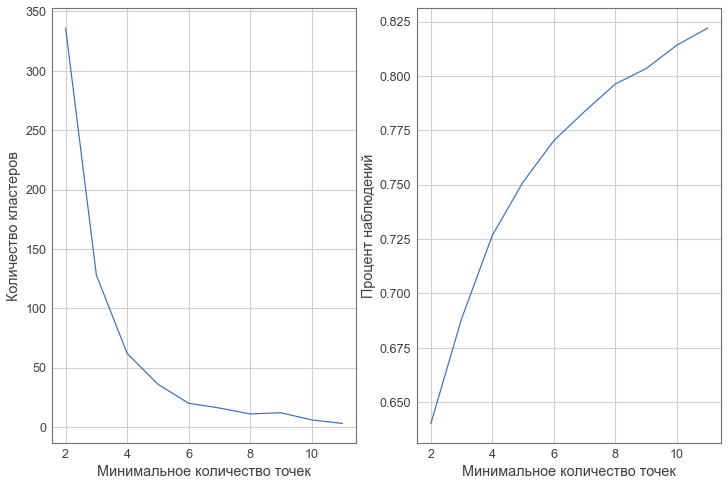

In [6]:
from tqdm import tqdm
smps = np.arange(2, 12, 1)

cl_num = []
obs_num = []

for i in tqdm(range(len(smps))):
    clus = DBSCAN(min_samples=smps[i]).fit(scaled_data)
    cl_num.append(len(set(clus.labels_)) - 1)
    obs_num.append(list(clus.labels_).count(-1) / len(list(clus.labels_)))

print(cl_num)
print(obs_num)
#cl_num = np.array(cl_num)
#obs_num = np.array(obs_num)

fig, axs = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(8)

axs[0].plot(smps, cl_num)
axs[0].set_xlabel('Минимальное количество точек') 
axs[0].set_ylabel("Количество кластеров")
axs[1].plot(smps, obs_num)
axs[1].set_xlabel('Минимальное количество точек') 
axs[1].set_ylabel("Процент наблюдений")
plt.show()

In [10]:
eps_range = np.arange(0.1, 3, 0.4)
min_samples_range = np.arange(1, 15, 2)

dbscan_df = pd.DataFrame(columns=['min samples', 'eps', 'clusters', 'noise'])

for min_samples in min_samples_range:
    for eps in eps_range:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
        n_clusters = len(set(clustering.labels_)) - 1
        percent_noises = list(clustering.labels_).count(-1) / len(list(clustering.labels_))
        dbscan_df = dbscan_df.append(
            {'min samples': min_samples, 'eps': eps, 'clusters': n_clusters, 'noise': percent_noises},
            ignore_index=True)


new_data = dbscan_df[(dbscan_df.clusters >= 5) & (dbscan_df.clusters <= 7) & (dbscan_df.noise <= 0.12)]
new_data

,min samples,eps,clusters,noise
15,3.0,2.9,5.0,0.022233


In [122]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
pca.explained_variance_ratio_

clustering = DBSCAN(eps=2.9, min_samples=3, n_jobs=-1).fit(scaled_data)

In [123]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
unique_labels.remove(-1)
unique_labels = [-1, *list(unique_labels)]
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

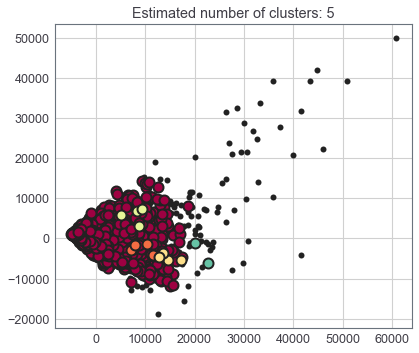

In [130]:
pca_data = PCA(n_components=2).fit_transform(data)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

xy = pca_data[(labels == -1)]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='k',
         markeredgecolor='k', markersize=6)

for k, col in zip(unique_labels, colors):
    if k == -1:
        continue

    class_member_mask = (labels == k)

    xy = pca_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10,
             markeredgewidth=2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [127]:
#Optics
#2
from sklearn.cluster import OPTICS
clustering = OPTICS(max_eps=2.9, min_samples=3, cluster_method='dbscan').fit(scaled_data)

labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)

5


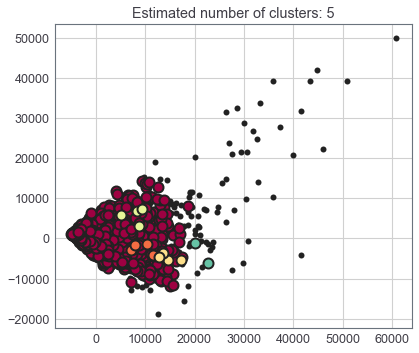

In [128]:
pca_data = PCA(n_components=2).fit_transform(data)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

xy = pca_data[(labels == -1)]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='k',
         markeredgecolor='k', markersize=6)

for k, col in zip(unique_labels, colors):
    if k == -1:
        continue

    class_member_mask = (labels == k)

    xy = pca_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10,
             markeredgewidth=2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

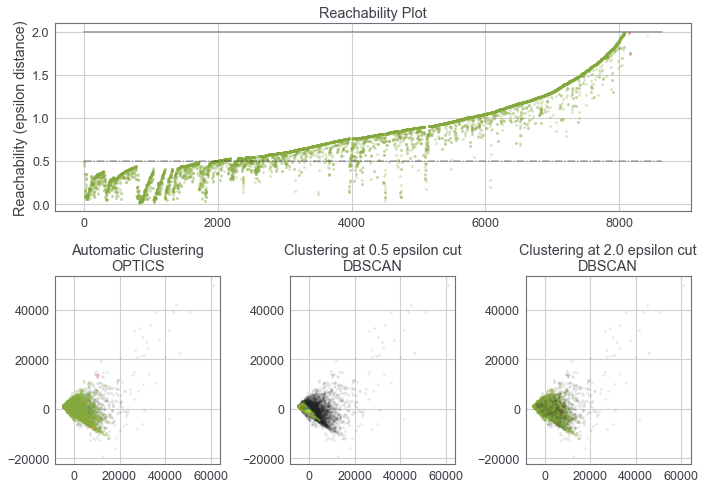

In [118]:
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec

def show_optics(clust):
    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(scaled_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')

    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    ax2.plot(pca_data[clust.labels_ == -1, 0], pca_data[clust.labels_ == -1, 1], 'k.', alpha=0.1)
    for klass, color in zip(range(0, 5), colors):
        Xk = pca_data[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    ax3.plot(pca_data[labels_050 == -1, 0], pca_data[labels_050 == -1, 1], 'k.', alpha=0.1)
    for klass, color in zip(range(0, 6), colors):
        Xk = pca_data[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = pca_data[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(pca_data[labels_200 == -1, 0], pca_data[labels_200 == -1, 1], 'k.', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()
    
show_optics(clustering)

In [120]:
#show_optics(clustering)

clusters: 55, not classified: 0.39


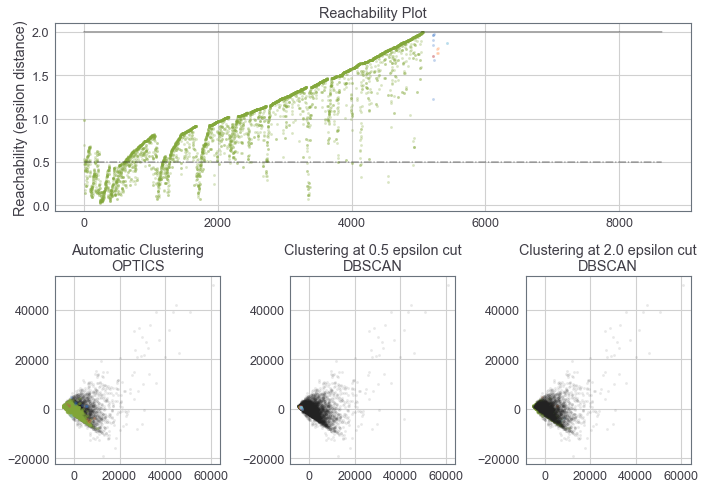

clusters: 0, not classified: 0.00


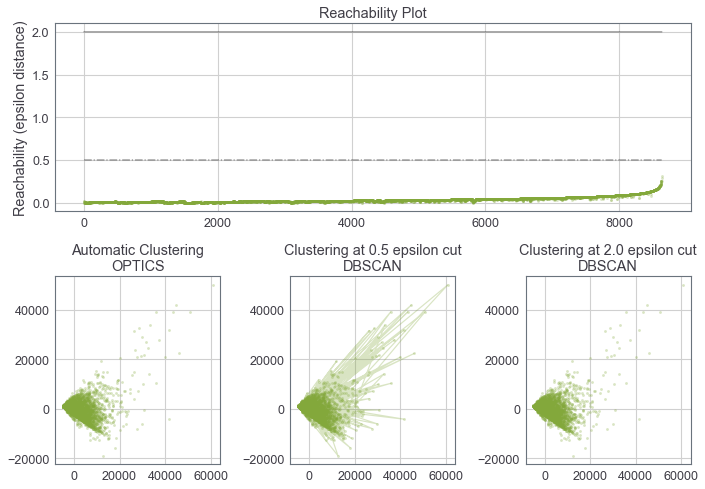

clusters: 2, not classified: 0.01


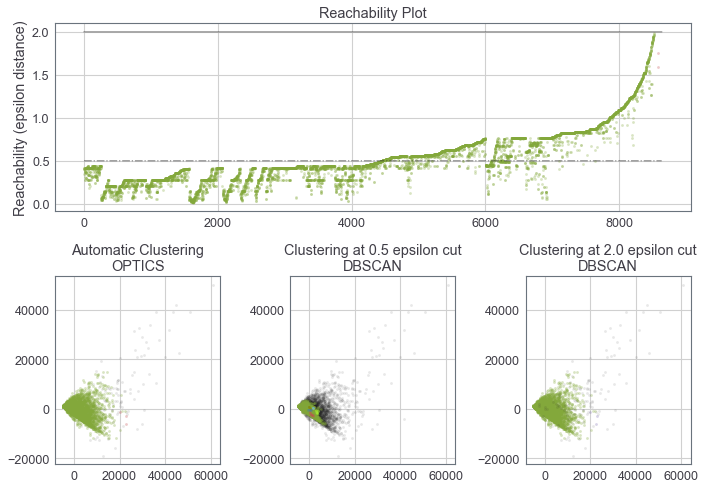

clusters: 55, not classified: 0.39


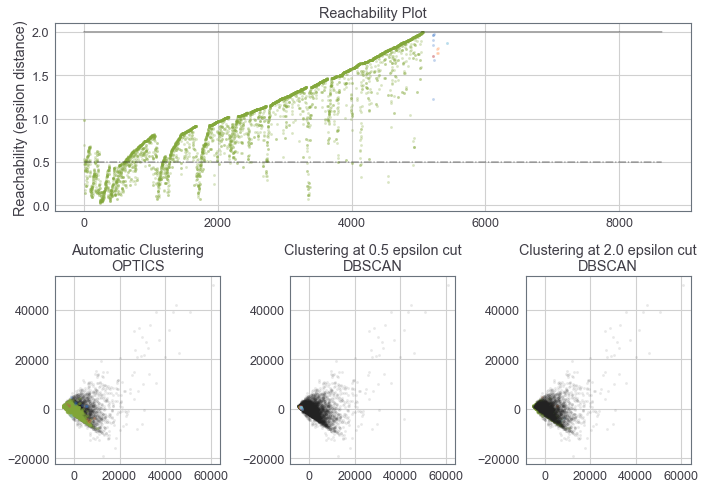

clusters: 6, not classified: 0.06


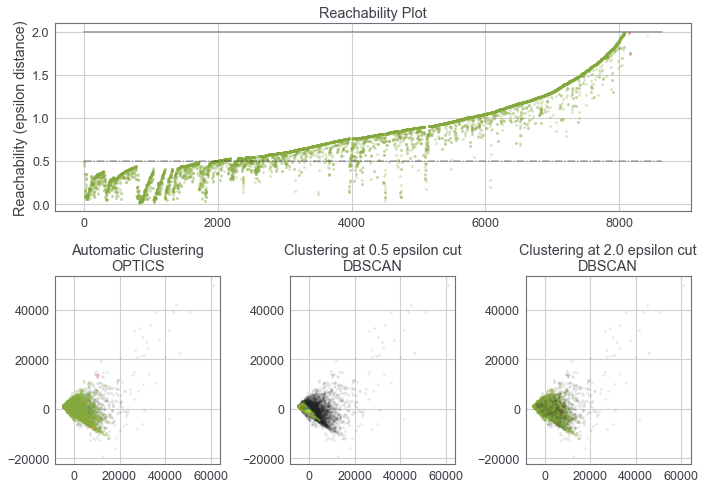

In [121]:
metrics = ['cityblock', 'cosine', 'chebyshev', 'l1', 'l2']
for metric in metrics:
    clustering = OPTICS(min_samples=3, max_eps=2, n_jobs=-1, cluster_method="dbscan", metric=metric).fit(scaled_data)
    num_of_clusters = len(set(clustering.labels_)) - 1
    not_classified = list(clustering.labels_).count(-1) / len(list(clustering.labels_))
    print('clusters: {}, not classified: {:.2f}'.format(num_of_clusters, not_classified))
    show_optics(clustering)